# Image Blending

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv # import open cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io 
from PIL import Image
import matplotlib.pylab as plt

# How does google colab works?
Google has all its servers on cloud. In one of the servers, my google colab notebook is running through some virtualization and operating system concepts. we are able to see this google colab through our web browser. So, it is not using computational resources of our browser/ our personal computer. It is using the computational resource of the server.  
So, If we want to use any file within this colab we need to download that to the server, to which we are assigned to.
All these google servers are Linux/ Unix based server at the backend. so all the commands that we can run on Linux terminal can be run on this server.
Now, let's break the code:
!wget "https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg" -O messi5.jpg  

**!** - says that this is not a python command, but the linux terminal command.

**wget** - means get from the web (get web)

**"https://.... "** - URL of the image

**-o** - save it with output

**messi5.jpg** - name of saved file 

In [1]:
# Download image from URL
!wget "https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg" -O messi5.jpg

--2021-06-15 05:10:38--  https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72937 (71K) [image/jpeg]
Saving to: ‘messi5.jpg’

messi5.jpg          100%[===================>]  71.23K  --.-KB/s    in 0.02s   

2021-06-15 05:10:38 (3.28 MB/s) - ‘messi5.jpg’ saved [72937/72937]



In [3]:
! ls -l

total 76
-rw-r--r-- 1 root root 72937 Jun 15 05:10 messi5.jpg
drwxr-xr-x 1 root root  4096 Jun  1 13:40 sample_data


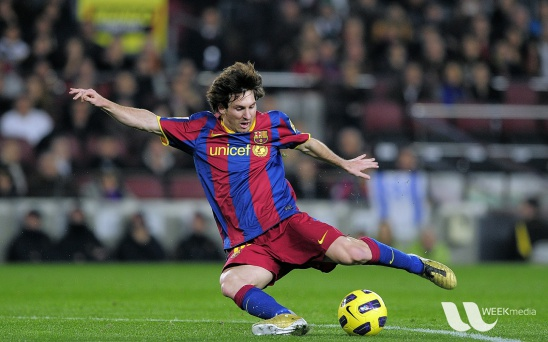

In [4]:
img1 = cv.imread('messi5.jpg')
cv2_imshow(img1)

In [5]:
print(img1.shape)

(342, 548, 3)


In [6]:
print(img1[100, 100])

[157 166 200]


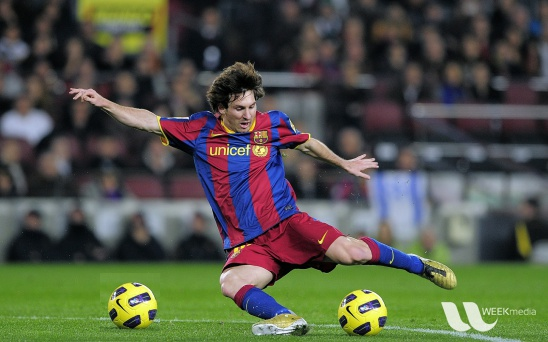

In [7]:
ball = img1[280:340, 330:390]
img1[273:333, 100:160] = ball

cv2_imshow(img1)

Idea: We can apply Matrix Algebra operations ( substraction, addition, multiplication, etc. ) on images. Percieve the images as a 3D matrix of size H * D * 3

Now, Let's download another image:

In [8]:
#Download another image: OpenCV Logo
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png -O opencv_logo.png

--2021-06-15 05:27:46--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30128 (29K) [image/png]
Saving to: ‘opencv_logo.png’

opencv_logo.png     100%[===================>]  29.42K  --.-KB/s    in 0.02s   

2021-06-15 05:27:46 (1.45 MB/s) - ‘opencv_logo.png’ saved [30128/30128]



In [9]:
img2 = cv.imread('opencv_logo.png')

In [10]:
print(img2.shape)

(600, 487, 3)


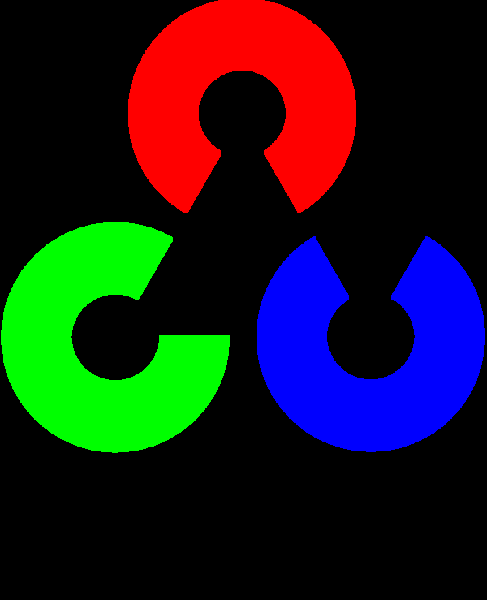

In [11]:
cv2_imshow(img2)

### Simple Math behind Image Blending: 
<font color='lightgreen'> Image Blending = Weighted addition of matrices </font>
This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency. 
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#image-arithmetics

These are the arguments meaning of the function:

addWeighted	(	InputArray 	src1,

double 	alpha,

InputArray 	src2,

double 	beta,

double 	gamma,

OutputArray 	dst,

int 	dtype = -1 
)	

In [13]:
dst = cv.addWeighted(img1,0.7,img2,0.3,0)

error: ignored

The error says that the two input images doesn't have equal sizes
This can be fixed by resizing the images

Refer to documentation: https://docs.opencv.org/master/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19


(600, 487, 3)


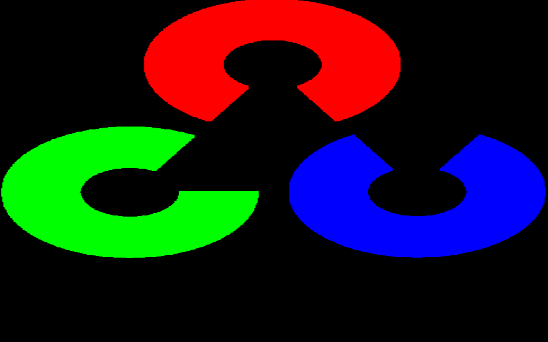

In [14]:
img2a = cv.resize(img2, (548, 342)) #resizing opencv logo to be same as messi image
print(img2.shape)
cv2_imshow(img2a)

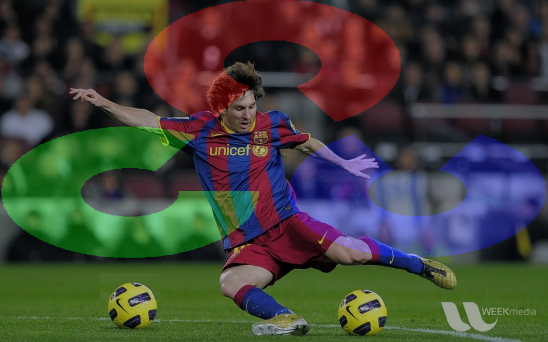

In [15]:
dst = cv.addWeighted(img1,0.7,img2a,0.3,0)
cv2_imshow(dst)

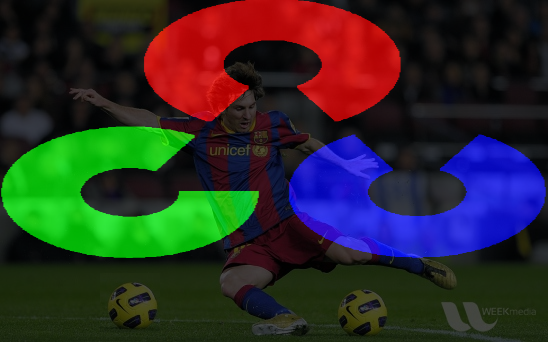

In [16]:
dst = cv.addWeighted(img1,0.3,img2a,0.7,0)
cv2_imshow(dst)